In [41]:

import pandas as pd
import numpy as np
# Replace with your actual filename
df= pd.read_csv('../youtube_videos_data.csv')

# Display the first 5 rows
print(df.head())

      Video ID                                              Title  \
0  eGsKwMSA6Ic             “Why is my website loading so slowly?”   
1  5e13FdKeTsE                 New Google Pay button for Flutter?   
2  QhhZt1wUtyo  Why are these login counts incorrect? Can you ...   
3  SqmOgdvfvSk  Unique challenges that mobile devs face? How i...   
4  OMwlK_5iRRc  Google Developer Experts build more with Googl...   

           Published At  Views  Likes  Comments  Duration (Seconds)  
0  2025-04-16T04:00:49Z   2481    207        16                63.0  
1  2025-04-15T04:00:04Z   2801    177         0                61.0  
2  2025-04-14T13:00:45Z   4499    115        13                26.0  
3  2025-04-12T04:00:23Z   4130    115         2                46.0  
4  2025-04-11T22:57:35Z   3019     49         7               108.0  


In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6542 entries, 0 to 6541
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Video ID            6542 non-null   object 
 1   Title               6542 non-null   object 
 2   Published At        6542 non-null   object 
 3   Views               6542 non-null   int64  
 4   Likes               6542 non-null   int64  
 5   Comments            6542 non-null   int64  
 6   Duration (Seconds)  6542 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 357.9+ KB


In [43]:
from sklearn.impute import SimpleImputer
imputer =SimpleImputer(missing_values=np.nan,strategy='mean')



In [44]:
df

,Video ID,Title,Published At,Views,Likes,Comments,Duration (Seconds)
0,eGsKwMSA6Ic,“Why is my website loading so slowly?”,2025-04-16T04:00:49Z,2481,207,16,63.0
1,5e13FdKeTsE,New Google Pay button for Flutter?,2025-04-15T04:00:04Z,2801,177,0,61.0
2,QhhZt1wUtyo,Why are these login counts incorrect? Can you ...,2025-04-14T13:00:45Z,4499,115,13,26.0
3,SqmOgdvfvSk,Unique challenges that mobile devs face? How i...,2025-04-12T04:00:23Z,4130,115,2,46.0
4,OMwlK_5iRRc,Google Developer Experts build more with Googl...,2025-04-11T22:57:35Z,3019,49,7,108.0
...,...,...,...,...,...,...,...
6537,5Eib_H_zCEY,Cluster Computing and MapReduce Lecture 3,2007-08-28T16:56:29Z,65518,223,8,2681.0
6538,yjPBkvYh-ss,Cluster Computing and MapReduce Lecture 1,2007-08-28T16:53:57Z,229758,892,55,2777.0
6539,-vD6PUdf3Js,Cluster Computing and MapReduce Lecture 2,2007-08-28T16:51:42Z,104574,320,34,3126.0
6540,1ZDybXl212Q,Cluster Computing and MapReduce Lecture 4,2007-08-28T16:46:15Z,124030,245,39,1411.0


In [45]:
print(df.duplicated().sum())

0


In [46]:
df.describe()

,Views,Likes,Comments,Duration (Seconds)
count,6.542000e+03,6542.000000,6542.000000,6542.000000
mean,4.786268e+04,278.908438,13.983797,1371.670284
std,6.275427e+05,1537.737267,52.661418,2804.293517
min,0.000000e+00,0.000000,0.000000,1.000000
25%,2.890250e+03,22.000000,1.000000,174.000000
50%,6.694000e+03,73.000000,4.000000,569.000000
75%,1.852650e+04,192.750000,11.000000,2005.750000
max,3.696957e+07,57404.000000,1829.000000,41219.000000


In [47]:
df.drop(['Title','Published At'],axis='columns',inplace=True)

In [48]:
df

,Video ID,Views,Likes,Comments,Duration (Seconds)
0,eGsKwMSA6Ic,2481,207,16,63.0
1,5e13FdKeTsE,2801,177,0,61.0
2,QhhZt1wUtyo,4499,115,13,26.0
3,SqmOgdvfvSk,4130,115,2,46.0
4,OMwlK_5iRRc,3019,49,7,108.0
...,...,...,...,...,...
6537,5Eib_H_zCEY,65518,223,8,2681.0
6538,yjPBkvYh-ss,229758,892,55,2777.0
6539,-vD6PUdf3Js,104574,320,34,3126.0
6540,1ZDybXl212Q,124030,245,39,1411.0


In [49]:
X = df.iloc[:, -1]
y=df.iloc[:,1]

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [51]:

X_train,y_train

(548      237.0
 5050    3039.0
 1575      93.0
 6078    3555.0
 1421     141.0
          ...  
 3772    1770.0
 5191    2440.0
 5226    1895.0
 5390    3448.0
 860       29.0
 Name: Duration (Seconds), Length: 5233, dtype: float64,
 548      2804
 5050     1460
 1575     5672
 6078     3787
 1421     9282
         ...  
 3772     4180
 5191    11093
 5226     3648
 5390     5519
 860      3104
 Name: Views, Length: 5233, dtype: int64)

In [52]:
!pip install seaborn

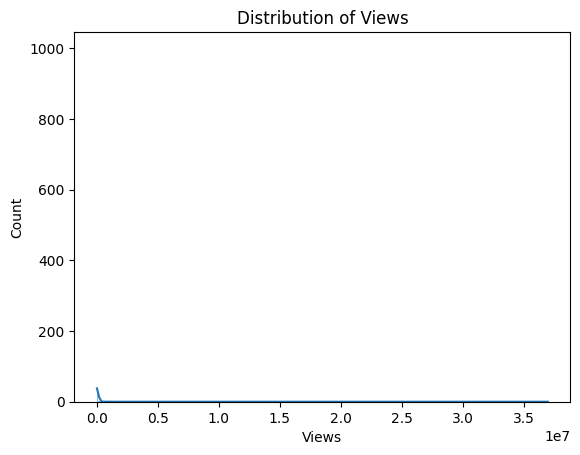

In [53]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Views'], kde=True)
plt.title('Distribution of Views')
plt.show()

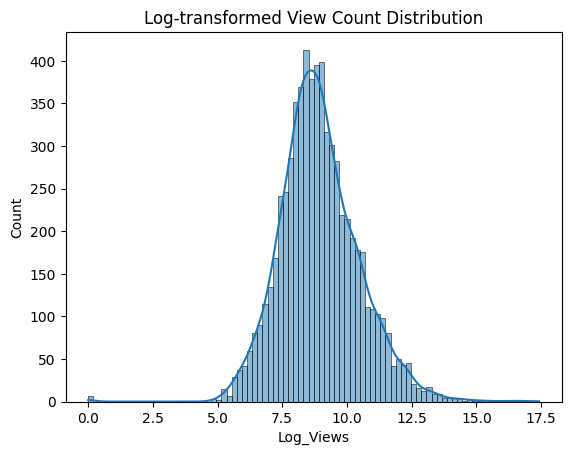

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df['Views'] = df['Views'].astype(float)  # Make sure it's numeric
df['Log_Views'] = np.log1p(df['Views'])  # log1p handles 0 values safely

sns.histplot(df['Log_Views'], kde=True)
plt.title("Log-transformed View Count Distribution")
plt.show()


In [55]:
print(X_train.dtypes)

float64


In [56]:
print(X_train.var())

7911774.441726259


In [58]:
from sklearn.preprocessing import StandardScaler
X_train_reshaped = X_train.values.reshape(-1, 1)  # If it's a single feature
X_test_reshaped = X_test.values.reshape(-1, 1) 
sc=StandardScaler()
X_train_scaled = sc.fit_transform(X_train_reshaped)

X_test_scaled = sc.transform(X_test_reshaped)

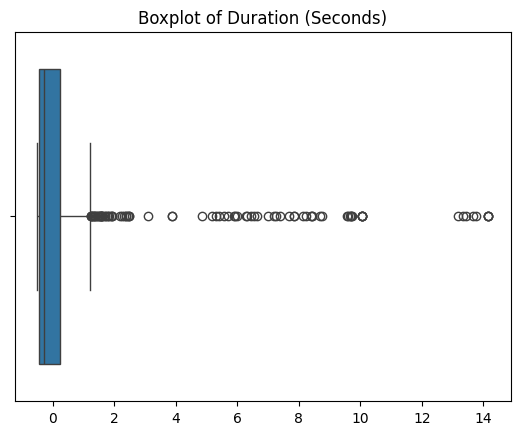

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=X_train_scaled.squeeze())  
plt.title("Boxplot of Duration (Seconds)")
plt.show()

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 1423420625422.5679
R² Score: -0.002092681708155242


In [ ]:
import os
print(os.getcwd())

c:\Users\falgu\OneDrive\Desktop\mlops\venv
